### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import shapiro

#### Load the Life expectancy dataset and display the first five records 

In [3]:
# load the csv file

# type your code here

# display the first five observations

# type your code here
df= pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [4]:
# check the size of the dataframe

# type your code here
df.count()

Country              182
Year                 182
Status               182
Adult_Mortality      173
Infant_Deaths        182
Alcohol               15
Hepatitis B          173
Measles              182
BMI                  178
Underfive_Deaths     182
Polio                182
Diphtheria           182
HIV                  182
GDP                  157
Population           141
Malnourished10_19    178
Malnourished5_9      178
Income_Index         169
Schooling            173
Life_Expectancy      173
dtype: int64

In [ ]:
# display dataset information understand the dataset

# type your code here

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
df['Life_Expectancy'].isnull().sum()

9

In [31]:
na_data=df['Life_Expectancy'].isnull()
na_data.index[na_data==True]

Int64Index([46, 100, 104, 111, 118, 122, 135, 138, 168], dtype='int64')

In [32]:
df.drop(df.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]],inplace=True)

In [33]:
df['Life_Expectancy'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
df.isnull().sum()
df.drop('Alcohol',axis=1,inplace=True)

In [34]:
df.isnull().sum()

Status                0
Adult_Mortality       0
Hepatitis B           9
Measles               0
BMI                   2
Underfive_Deaths      0
Polio                 0
Diphtheria            0
HIV                   0
GDP                  21
Population           34
Malnourished10_19     2
Malnourished5_9       2
Income_Index          7
Schooling             7
Life_Expectancy       0
dtype: int64

In [35]:
df['GDP']=df['GDP'].fillna(df['GDP'].median())
df['Hepatitis B']=df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Malnourished10_19']=df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())
df['Malnourished5_9']=df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())
df['Population']=df['Population'].fillna(df['Population'].median())


In [36]:
df['Schooling']=df['Schooling'].fillna(df['Schooling'].mean())
df['Income_Index']=df['Income_Index'].fillna(df['Income_Index'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [37]:
df.isnull().sum()

Status               0
Adult_Mortality      0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
df.describe(include='object')

,Country,Status
count,182,182
unique,182,2
top,Dominican Republic,Developing
freq,1,150


In [7]:
df.drop('Country',axis=1,inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,182.0,2.014890e+03,4.570032e-01,2013.000000,2015.000000,2.015000e+03,2.015000e+03,2.015000e+03
Adult_Mortality,173.0,1.499711e+02,9.567985e+01,1.000000,74.000000,1.370000e+02,1.990000e+02,4.840000e+02
Infant_Deaths,182.0,2.174176e+01,8.229716e+01,0.000000,0.000000,2.000000e+00,1.500000e+01,9.100000e+02
Hepatitis B,173.0,8.171098e+01,2.539199e+01,6.000000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01
Measles,182.0,1.482104e+03,7.859929e+03,0.000000,0.000000,9.000000e+00,1.972500e+02,9.038700e+04
BMI,178.0,4.441124e+01,2.130561e+01,2.500000,24.425000,5.265000e+01,6.210000e+01,8.730000e+01
Underfive_Deaths,182.0,2.885165e+01,1.059044e+02,0.000000,0.000000,2.000000e+00,1.950000e+01,1.100000e+03
Polio,182.0,8.296154e+01,2.497366e+01,5.000000,83.250000,9.300000e+01,9.775000e+01,9.900000e+01
Diphtheria,182.0,8.435714e+01,2.295802e+01,6.000000,84.000000,9.400000e+01,9.700000e+01,9.900000e+01
HIV,182.0,6.203297e-01,1.332830e+00,0.100000,0.100000,1.000000e-01,3.000000e-01,9.300000e+00


In [12]:
df['Year'].value_counts()

2015    172
2013     10
Name: Year, dtype: int64

In [13]:
df.drop('Year',axis=1,inplace=True)

In [14]:
df.drop('Infant_Deaths',axis=1,inplace=True) # already data present in underfive, thus this becomes redundant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
df.describe(include='object')
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [18]:
df['Status']=pd.get_dummies(df['Status'],drop_first=True)

In [28]:
df.isnull().sum()

Status                0
Adult_Mortality       9
Hepatitis B           9
Measles               0
BMI                   4
Underfive_Deaths      0
Polio                 0
Diphtheria            0
HIV                   0
GDP                  25
Population           41
Malnourished10_19     4
Malnourished5_9       4
Income_Index         13
Schooling             9
Life_Expectancy       9
dtype: int64

<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here
X=df.drop('Life_Expectancy',axis=1)
y=df['Life_Expectancy']
X=sm.add_constant(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_Train,X_test,y_Train,y_Test=train_test_split(X,y,test_size=.30)
MLR_Model= sm.OLS(y_Train,X_Train).fit()

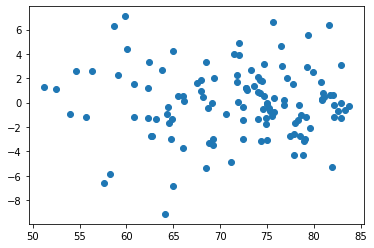

In [41]:
res=MLR_Model.resid
fittedValues= MLR_Model.fittedvalues
import matplotlib.pyplot as plt 
plt.scatter(x=fittedValues,y=res)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# type your code here Find sum of square errors
df.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

In [44]:
X=df.iloc[:,[2,6,7]]
y=df['Life_Expectancy']
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(X,y)
y_pred=lr.predict(X)


In [45]:
SSE= np.sum((y-y_pred)**2)
print('Unexplained Variation for the model is',SSE)

Unexplained Variation for the model is 7272.4649163342965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
X=df.iloc[:,[11,12]]
y=df['Life_Expectancy']
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model2=lr.fit(X_train,y_train)
for coeff,col in zip(model2.coef_,X.columns):
    print(coeff,col)
model2.intercept_

-0.2089197326977632 Malnourished10_19
-0.5494692823427185 Malnourished5_9


75.52871352643271

In [63]:
X=df.iloc[:,[11,12]]
y=df['Life_Expectancy']
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model3=sm.OLS(y_train,X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life_Expectancy   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              59.29
Date:                Sat, 14 Aug 2021   Prob (F-statistic):                    1.36e-18
Time:                        11:02:40   Log-Likelihood:                         -647.52
No. Observations:                 121   AIC:                                      1299.
Df Residuals:                     119   BIC:                                      1305.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here
X=df['Adult_Mortality'].values
X= X.reshape(-1,1)
y=df['Life_Expectancy']
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)
least_sq=lr.fit(X_train,y_train)
y_pred_ls=least_sq.predict(X_train)



In [71]:
from sklearn.linear_model import SGDRegressor

In [72]:
sgd=SGDRegressor()

In [73]:
sgd_model= sgd.fit(X_train,y_train)
y_pred_sgd=least_sq.predict(X_train) 

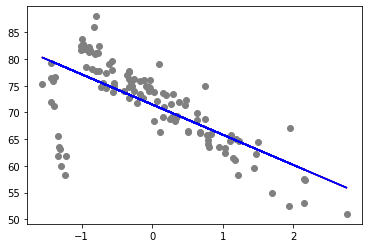

In [82]:
plt.scatter(X_train,y_train,color='grey')
plt.plot(X_train,y_pred_ls,color='red')
plt.plot(X_train,y_pred_sgd,color='blue') # red and blue same is overlapping

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
# type your code here
X=df.iloc[:,[2,6,7]]
y=df['Life_Expectancy']
X_scaled= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)
lr1=lr.fit(X_train,y_train)




In [86]:
sgd1=sgd.fit(X_train,y_train)

In [88]:
df_coeff=pd.DataFrame([lr1.coef_,sgd1.coef_],columns=X.columns,index=['Linear reg coeff','sgd_coeff'])
df_coeff

,Hepatitis B,Polio,Diphtheria
Linear reg coeff,-0.809287,2.608430,3.359443
sgd_coeff,0.031181,2.674606,2.495327


<AxesSubplot:>

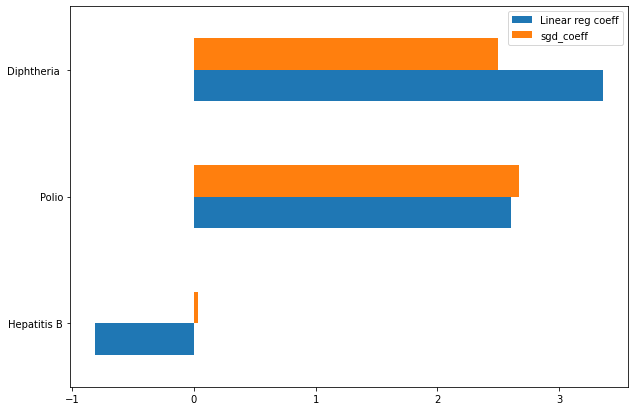

In [91]:
df_coeff.T.plot.barh(figsize=(10,7))

 <table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# type your code here
X=df.drop('Life_Expectancy',axis=1)
y=df['Life_Expectancy']
X_Scaled= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
lin1=lr.fit(X_train,y_train)

train_pred=lin1.predict(X_train)
test_pred=lin1.predict(X_test)

from sklearn.metrics import mean_squared_error

train_error=mean_squared_error(y_train,train_pred)
test_error=mean_squared_error(y_test,test_pred)

print('Testing RMSE',np.sqrt(test_error))
print('TRAINING RMSE',np.sqrt(train_error))


Testing RMSE 2.894459249249605
TRAINING RMSE 2.8051776512787203


In [97]:
# model not overfitting, since errors are relatively close


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

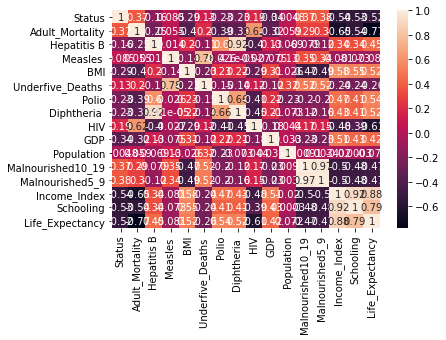

In [98]:
# type your code here
fig_dim
sns.heatmap(df.corr(),annot=True)

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
# from the corr plot we conclude that 
# the predicted or independent variables , such as mal_nutr's have positive correlation .97
# and other variables are correlated too 
# we need to perform operation to eliminate the related variables. 


# LASSO- Least absolute shrinkage selection operater
# RIDGE - 

In [101]:
# type your code here
from sklearn.linear_model import Lasso,Ridge

In [102]:
ridge=Ridge(alpha=5.5)
ridge_model= ridge.fit(X_train,y_train)

train_pred= ridge_model.predict(X_train)
test_pred= ridge_model.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,test_pred))

print('RMSE_train',RMSE_train)
print('RMSE_test',RMSE_test)


RMSE_train 3.088974453888931
RMSE_test 3.242901706050574


C:\Users\rathn\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44112e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
# type your code here
X=df.iloc[:,[2,3,6,7,8]]
y=df['Life_Expectancy']
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
mod=sm.OLS(y_train,X_train).fit()

train_pred= mod.predict(X_train)
test_pred= mod.predict(X_test)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,test_pred))



print('RMSE_train',RMSE_train)
print('RMSE_test',RMSE_test)




RMSE_train 5.051901931571741
RMSE_test 7.096438600403804


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [108]:
# type your code here
X=df.iloc[:,[3,8,11,12]]
y=df['Life_Expectancy']
X_Sclaed= sc.fit_transform(X)
lasso=Lasso(alpha=1)
X_train,X_test,y_train,y_test=train_test_split(X_Sclaed,y,test_size=.3)
las_mod=lasso.fit(X_train,y_train)
las_mod.coef_

array([-0.        , -3.44723904, -0.        , -1.98385287])

15

In [125]:
# type your code here
X=df.drop('Life_Expectancy',axis=1)
y=df['Life_Expectancy']
X_Sclaed= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_Sclaed,y,test_size=.3)
from sklearn.linear_model import ElasticNet
est_net=ElasticNet(alpha=.1,l1_ratio=.001)

elnet=est_net.fit(X_train,y_train)
train_pred=elnet.predict(X_train)
test_pred=elnet.predict(X_test)


RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,test_pred))



print('RMSE_train',RMSE_train)
print('RMSE_test',RMSE_test)

RMSE_train 2.8102718556683786
RMSE_test 3.001292307025895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
# type your code here


lasso= Lasso(alpha=.5)
las_model=lasso.fit(X_train,y_train)
for coef,col in zip(las_model.coef_,X.columns):
    if coef!=0:
        print(coef,col)

-0.37195744578058104 Status
-2.192559485867906 Adult_Mortality
0.61961848669053 Hepatitis B
0.27400089484849033 Polio
-0.40597738480289014 HIV
-0.03487060268023641 Malnourished5_9
4.347267579660496 Income_Index
0.12820374810906798 Schooling


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# type your code here
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
param= [{'alphs':[7,8,9,10,11]}]
ridge_grid=GridSearchCV(estimator=ridge,param_grid=param,cv= 5)

ridge_grid.fit(X_train,y_train)
print(ridge_grid.best_params_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
# type your code here
lasso=Lasso()
param= [{'alphs':[7,8,9,10,11]}]
lasso_grid=GridSearchCV(estimator=lasso,param_grid=param,cv= 5)

lasso_grid.fit(X_train,y_train)
print(lasso_grid.best_params_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [136]:
# type your code here
X=df.iloc[:,[3,8,11,12]]
y=df['Life_Expectancy']
elnet=ElasticNet()
X_Sclaed= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_Sclaed,y,test_size=.3)
param= [{'alphs': [0.1,0.5,1,1.5,2,2.5,3,3.5,4],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
elnet_grid=GridSearchCV(estimator=elnet,param_grid=param,cv= 10)

elnet_grid.fit(X_train,y_train)
print(elnet_grid.best_params_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
# type your code here
X=df.drop('Life_Expectancy',axis=1)
y=df['Life_Expectancy']
elnet=ElasticNet(alpha=.8)
X_Sclaed= sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_Sclaed,y,test_size=.3)
param= [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]
elnet_full=GridSearchCV(estimator=elnet,param_grid=param,cv= 10)

elnet_full.fit(X_train,y_train)
print(elnet_full.best_params_)

{'l1_ratio': 1}
